In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import argparse
from node2vec import Node2Vec
import itertools
import plotly.graph_objs as go

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
def read_dimacs_cnf(filename):
    clauses = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("c"):
                continue
            if line.startswith("p cnf"):
                num_vars, num_clauses = map(int, line.strip().split()[2:])
            else:
                clause = list(map(int, line.strip().split()[:-1]))
                clauses.append(clause)
    return num_vars, clauses

def generate_node_embeddings(clauses):
    G = nx.Graph()
    for clause in clauses:
        for literal in clause:
            G.add_node(abs(literal))
        for i in range(len(clause)):
            for j in range(i+1, len(clause)):
                G.add_edge(abs(clause[i]), abs(clause[j]))

    node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=40, workers=4)
    model = node2vec.fit(window=10, min_count=1, batch_words=4)
    return model, G

In [3]:
def utworzSkierowanyGraf(G1, model_2):
    G2 = nx.DiGraph()
    for i in G1.nodes:
        node, waga = model_2.wv.most_similar(f'{i}')[0]
        G2.add_edge(i, int(node))

    # pos = nx.shell_layout(G2)
    pos = nx.spring_layout(G2, scale=10) # pozycjonowanie wierzchołków
    nx.draw(G2, pos, with_labels=True, node_size=150, arrowsize=20) 
    labels = nx.get_edge_attributes(G2, 'weight') # pobranie wag krawędzi
    nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels) # rysowanie wag krawędzi
    plt.show()
    return G2, pos

In [4]:
# nazwa = "DIMACS_files/easy/sat/Analiza1-itox_vc1033.cnf"
# cala_operacja(nazwa)

In [ ]:
# nazwa = "DIMACS_files/medium/unsat/Analiza1-AProVE07-08.cnf"
# cala_operacja(nazwa)

In [5]:
def interactive_directed_graph(G, pos):
    edge_trace = go.Scatter(
        x=[],
        y=[],
        line=dict(width=1, color='#888'),
        hoverinfo='none',
        mode='lines',
        marker=dict(
            showscale=False,
            colorscale='Blues',
            reversescale=True,
            color=[],
            size=5,
            colorbar=dict(
                thickness=15,
                title='Weight',
                xanchor='left',
                titleside='right'
            ),
            line=dict(width=2)))

    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace['x'] += (x0, x1, None)
        edge_trace['y'] += (y0, y1, None)

    # Dodanie strzałek na krawędziach skierowanych
    arrows = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        arrows.append(go.Scatter(x=[x0, x1, None], y=[y0, y1, None],
                                 mode='lines',
                                 line=dict(color='black', width=1),
                                 hoverinfo='none',
                                 showlegend=False))

    arrow_annotations = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        arrow_annotations.append(
            dict(
                x=x1, y=y1,
                xref='x', yref='y',
                showarrow=True,
                arrowhead=3,
                arrowsize=1,
                arrowwidth=1,
                arrowcolor='black',
                ax=x0, ay=y0
            )
        )

    node_trace = go.Scatter(
        x=[],
        y=[],
        text=[],
        mode='markers+text',
        hoverinfo='text',
        marker=dict(
            colorscale='Blues',
            reversescale=False,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Degree',
                xanchor='left',
                titleside='right'
            ),
            line=dict(width=2)))

    for node in G.nodes():
        x, y = pos[node]
        node_trace['x'] += (x,)
        node_trace['y'] += (y,)
        node_trace['text'] += ('Var: ' + str(node),)

    for node, adjacencies in enumerate(G.adjacency()):
        node_trace['marker']['color'] += (len(adjacencies[1]),)

    layout = go.Layout(
        titlefont=dict(size=12),
        showlegend=False,
        hovermode='closest',
        margin=dict(b=5, l=5, r=5, t=5),
        annotations=[dict(
            text="",
            showarrow=False,
            xref="paper", yref="paper")],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()


Number of variables: 100 [[16, 30, 95], [-16, 30, 95], [-30, 35, 78], [-30, -78, 85], [-78, -85, 95], [8, 55, 100], [8, 55, -95], [9, 52, 100], [9, 73, -100], [-8, -9, 52], [38, 66, 83], [-38, 83, 87], [-52, 83, -87], [66, 74, -83], [-52, -66, 89], [-52, 73, -89], [-52, 73, -74], [-8, -73, -95], [40, -55, 90], [-40, -55, 90], [25, 35, 82], [-25, 82, -90], [-55, -82, -90], [11, 75, 84], [11, -75, 96], [23, -75, -96], [-11, 23, -35], [-23, 29, 65], [29, -35, -65], [-23, -29, 84], [-35, 54, 70], [-54, 70, 77], [19, -77, -84], [-19, -54, 70], [22, 68, 81], [-22, 48, 81], [-22, -48, 93], [3, -48, -93], [7, 18, -81], [-7, 56, -81], [3, 18, -56], [-18, 47, 68], [-18, -47, -81], [-3, 68, 77], [-3, -77, -84], [19, -68, -70], [-19, -68, 74], [-68, -70, -74], [54, 61, -62], [50, 53, -62], [-50, 61, -62], [-27, 56, 93], [4, 14, 76], [4, -76, 96], [-4, 14, 80], [-14, -68, 80], [-10, -39, -89], [1, 49, -81], [1, 26, -49], [17, -26, -49], [-1, 17, -40], [16, 51, -89], [-9, 57, 60], [12, 45, -51], [2,

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Computing transition probabilities: 100%|██████████| 100/100 [00:00<00:00, 1136.62it/s]


[('17', 0.7024582624435425), ('49', 0.6901268362998962), ('26', 0.678525447845459), ('94', 0.6160147190093994), ('40', 0.5572779178619385), ('25', 0.5365127325057983), ('79', 0.5255820155143738), ('90', 0.5227475762367249), ('81', 0.5057581663131714), ('55', 0.490971177816391)]


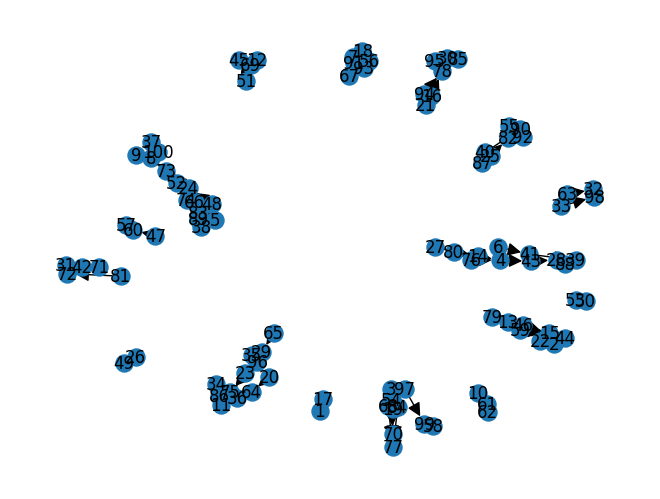

[(16, 78), (78, 30), (30, 78), (95, 30), (35, 23), (23, 75), (85, 30), (8, 100), (100, 8), (55, 90), (90, 82), (9, 8), (52, 73), (73, 8), (38, 83), (83, 66), (66, 52), (87, 25), (25, 82), (74, 52), (89, 66), (40, 90), (82, 90), (11, 75), (75, 11), (84, 77), (77, 70), (96, 75), (29, 23), (65, 29), (54, 70), (70, 77), (19, 77), (22, 15), (15, 44), (68, 77), (81, 72), (72, 42), (48, 24), (24, 73), (93, 56), (56, 93), (3, 77), (7, 93), (18, 56), (47, 60), (60, 57), (61, 62), (62, 61), (50, 53), (53, 50), (27, 80), (80, 14), (4, 43), (43, 28), (14, 4), (76, 4), (10, 61), (39, 88), (88, 28), (1, 17), (17, 1), (49, 26), (26, 49), (51, 45), (45, 69), (57, 60), (12, 69), (69, 12), (2, 15), (33, 98), (98, 32), (32, 98), (5, 66), (42, 31), (31, 42), (64, 36), (36, 11), (20, 64), (37, 100), (71, 31), (91, 56), (94, 78), (44, 15), (79, 15), (6, 41), (41, 39), (46, 44), (28, 88), (21, 16), (86, 11), (59, 15), (13, 44), (99, 58), (58, 99), (67, 93), (34, 86), (97, 99), (92, 82), (63, 32)]


In [11]:
def cala_operacja(nazwa_pliku):
    num_vars, clauses = read_dimacs_cnf(nazwa_pliku)
    print(f"Number of variables: {num_vars} {clauses}") # liczba zmiennych i klauzul
    model, G = generate_node_embeddings(clauses)
    print(model.wv.most_similar('1')) # najbliższe wierzchołki
    G2, pos = utworzSkierowanyGraf(G, model)
    print(G2.edges) # krawędzie skierowane
    interactive_directed_graph(G2, pos)
    return num_vars, clauses

nazwa = "DIMACS_files/turbo_easy/example_2.cnf"
num_vars, clauses = cala_operacja(nazwa)
